# Classifiers
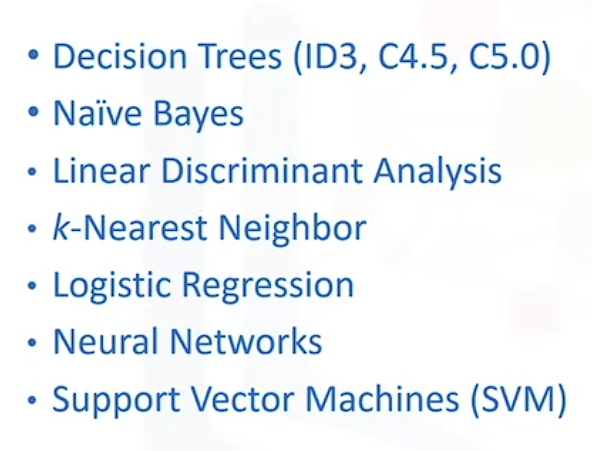

# K-Nearest Neigbhor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service**

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [33]:
features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']
X = df[features]
Y = df['custcat']
Std_scaler = StandardScaler()
X = Std_scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)
print("train Set :",x_train.shape,y_train.shape)
print("test Set :",x_test.shape,y_test.shape)

train Set : (800, 11) (800,)
test Set : (200, 11) (200,)


In [34]:
model = KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
y_preds = model.predict(x_test)

In [35]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_preds) * 100)

Accuracy :  33.5


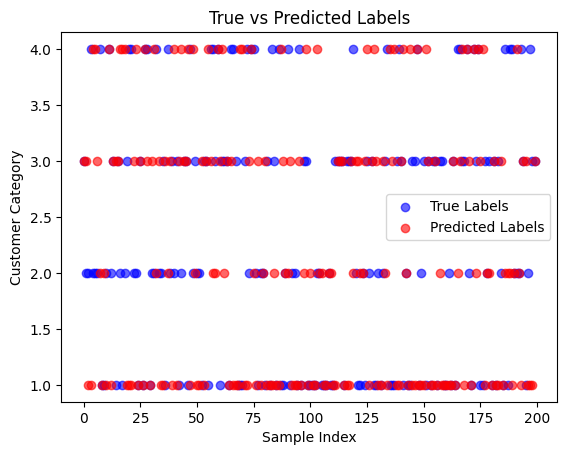

In [36]:
plt.scatter(range(len(y_test)), y_test, alpha=0.6, label="True Labels", color='blue')
plt.scatter(range(len(y_preds)), y_preds, alpha=0.6, label="Predicted Labels", color='red')
plt.legend()
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Customer Category")
plt.show()

In [37]:
result = {}
def KNN():
  for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    y_preds = model.predict(x_test)
    result[k] = metrics.accuracy_score(y_test,y_preds) * 100
  return result


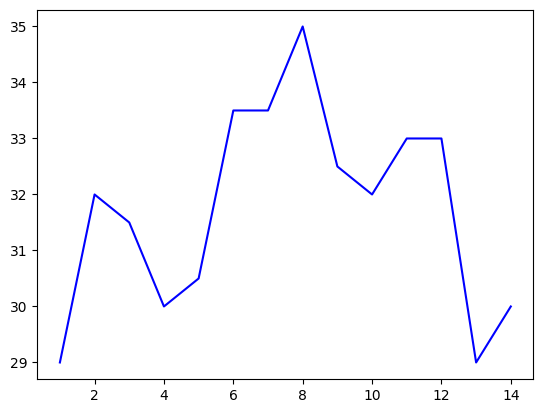

{8: 35.0, 6: 33.5, 7: 33.5, 11: 33.0, 12: 33.0, 9: 32.5, 2: 32.0, 10: 32.0, 3: 31.5, 5: 30.5, 4: 30.0, 14: 30.0, 1: 28.999999999999996, 13: 28.999999999999996}


In [38]:
result = KNN()
plt.plot(result.keys(),result.values(),color="blue")
plt.show()
print(dict(sorted(result.items(),key=lambda item:item[1],reverse=True)))